# Simulated Birfucation on a large scale

### Libraries

In [1]:
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt

In [2]:
from models.simulated_bifurcation import simulated_bifurcation
#from charts import pie, table
#from csv_reader import csv_to_matrix
#from data.assets import assets

import pandas as pd
import numpy as np

import bahc 

In [3]:
# Reading the CSV file, parsing dates
rets=pd.read_csv("russell1000.csv", parse_dates=True, index_col = 0)

# Defining the list of tickers from the DataFrame
tickers = [*rets.columns]

In [4]:
rets.head()

,A,AA,AAN,AAP,AAPL,ABC,ABT,ACGL,ACM,ACN,...,XEL,XL,XLNX,XOM,XRAY,XRX,Y,YUM,ZBRA,ZION
index,,,,,,,,,,,,,,,,,,,,,
2005-01-03 05:00:00+00:00,-0.009171,-0.013780,-0.013544,-0.002981,-0.016597,-0.009073,0.000429,-0.015625,NaN,-0.023610,...,-0.009939,-0.014921,-0.010851,-0.023089,-0.010014,-0.002354,0.002276,-0.007660,-0.015579,-0.009452
2005-01-04 05:00:00+00:00,-0.026736,-0.018236,-0.046520,-0.006681,0.009428,-0.007942,-0.010122,-0.013210,NaN,-0.023792,...,-0.015097,0.002350,-0.030814,-0.006811,-0.008121,-0.014841,-0.019068,-0.013331,-0.017110,-0.013746
2005-01-05 05:00:00+00:00,-0.000430,-0.005933,0.010422,0.001848,0.008720,-0.001909,-0.011538,-0.005868,NaN,-0.003891,...,-0.011332,-0.009566,-0.032157,-0.005240,-0.011847,-0.019934,-0.008917,-0.002384,-0.035504,-0.003617
2005-01-06 05:00:00+00:00,-0.022189,0.004288,-0.010422,-0.000923,0.000775,0.008474,0.022303,-0.001339,NaN,-0.009007,...,-0.001711,0.000658,-0.016106,0.012650,0.004756,-0.004280,-0.014456,0.011219,0.001521,0.005721
2005-01-07 05:00:00+00:00,-0.000880,0.010152,-0.042311,-0.005790,0.070283,-0.002932,0.016986,0.010393,NaN,0.045751,...,-0.005724,0.001184,0.008451,-0.006606,-0.007694,-0.005530,-0.003729,-0.005594,0.008511,-0.024621


In [5]:
rets.shape

(3397, 723)

In [6]:
len(tickers)

723

# Optimisation

In [7]:
alpha = 1  # num bits


T=250

dT=20

Nmax=50

t1s=np.arange(T,rets.shape[0],dT)

In [8]:
t1s

array([ 250,  270,  290,  310,  330,  350,  370,  390,  410,  430,  450,
        470,  490,  510,  530,  550,  570,  590,  610,  630,  650,  670,
        690,  710,  730,  750,  770,  790,  810,  830,  850,  870,  890,
        910,  930,  950,  970,  990, 1010, 1030, 1050, 1070, 1090, 1110,
       1130, 1150, 1170, 1190, 1210, 1230, 1250, 1270, 1290, 1310, 1330,
       1350, 1370, 1390, 1410, 1430, 1450, 1470, 1490, 1510, 1530, 1550,
       1570, 1590, 1610, 1630, 1650, 1670, 1690, 1710, 1730, 1750, 1770,
       1790, 1810, 1830, 1850, 1870, 1890, 1910, 1930, 1950, 1970, 1990,
       2010, 2030, 2050, 2070, 2090, 2110, 2130, 2150, 2170, 2190, 2210,
       2230, 2250, 2270, 2290, 2310, 2330, 2350, 2370, 2390, 2410, 2430,
       2450, 2470, 2490, 2510, 2530, 2550, 2570, 2590, 2610, 2630, 2650,
       2670, 2690, 2710, 2730, 2750, 2770, 2790, 2810, 2830, 2850, 2870,
       2890, 2910, 2930, 2950, 2970, 2990, 3010, 3030, 3050, 3070, 3090,
       3110, 3130, 3150, 3170, 3190, 3210, 3230, 32

In [5]:

ptf=[]
all_sel_cols=[]

for t1 in t1s:
    t0=t1-T
    print('t0 :', t0)
    rets_loop=np.array(rets.values[t0:t1,1:],dtype=np.float64)
    
    sel_cols= np.isnan(rets_loop).sum(axis=0)==0
    rets_loop=rets_loop[:,sel_cols]
#    print(rets_loop.shape)
    rets_loop=rets_loop[:,:Nmax]
    
    # Computation of the covariance matrix
    sigma = bahc.filterCovariance(rets_loop.T)
    
    
    # Computation of expected returns
    mu = rets_loop.mean(axis=0)     # 0 ?
#    mu = np.zeros(rets_loop)
    mu = np.expand_dims(mu, axis=1)
    print('Shape of mu :', mu.shape)
    print('Shape of sima :', sigma.shape)
    
    # Creation of a simualted bifurcation class (Here it is not optimized yet)
    model = simulated_bifurcation(sigma,mu,number_of_bits = alpha, assets_list = tickers)
    print('Shape of the Matrix for Binary tranformation :', model.matrix.shape)
    
    # Running Simulated Bifurcation
    model.optimize()
    
    #
    ptf.append(model.portfolio['dataframe'])
    all_sel_cols.append(sel_cols)

NameError: name 't1s' is not defined

In [13]:
# Version François

ptf=[]
portfolio_returns = [] # Store portfolio returns
idx = 0 #Count interations
all_sel_cols=[] #?

for t1 in t1s:
    t0=t1-T
    t2 = t1+dT
    print('t0 :', t0)
    rets_loop=np.array(rets.values[t0:t1,:],dtype=np.float64) #retrive the results in t0:t1 window
    df_returns = rets.iloc[t0:t1].dropna(axis = 1) # remove empty columns
    tickers = list(df_returns.columns)
    n_tickers = len(tickers)# This is the list of tickers we are considering before optimisation
    print("There are {} tickers before Optimization".format(n_tickers))
    df_values = df_returns.values #convert to numpy array
    

    
    # Computation of the covariance matrix
    sigma = bahc.filterCovariance(df_values.T) #Why transpose ?
    
    
    # Computation of expected returns
    
    mu = np.zeros((n_tickers, 1))
#     mu = df_returns.mean(axis=0)     # SHould we take compounded return instead?
# #    mu = np.zeros(rets_loop)
#     mu = np.expand_dims(mu, axis=1)
    print('Shape of mu :', mu.shape)
    print('Shape of sigma :', sigma.shape)
    
    
    
    # Creation of a simualted bifurcation class (Here it is not optimized yet)
    model = simulated_bifurcation(covariance = sigma, expected_return = mu, number_of_bits = alpha, assets_list = tickers)
    print('Shape of the Matrix for Binary tranformation :', model.matrix.shape)
    
    # Running Simulated Bifurcation
    model.optimize()
    
    result = model.portfolio['dataframe']
    ptf.append(result)
    
    # Computation of the weight
    w = result.loc[:, 'ratios'].values / 100
    
    # Tickers kept
    tickers_kept = list(result.loc[:, 'assets'])
    
    nb_assets_kept = (len(tickers_kept))
    print('Number of selected assets in the portfolio :', nb_assets_kept)
    
    
    proportion_of_asset_kepts = nb_assets_kept / sigma.shape[0]

    
    # Computation of the portfolio return
#     new_df_returns = rets.iloc[t1:t2].dropna(axis = 1) 
    
#     mu = np.array(new_df_returns.loc[:, tickers_kept].mean(axis = 0))
#     portfolio_return = w @ mu
#     portfolio_returns.append(portfolio_return)
    
    


t0 : 0
There are 55 tickers before Optimization
Shape of mu : (55, 1)
Shape of sigma : (55, 55)
Shape of the Matrix for Binary tranformation : (55, 55)
Run in 1.398 seconds.
Number of selected assets in the portfolio : 0
t0 : 20
There are 55 tickers before Optimization
Shape of mu : (55, 1)
Shape of sigma : (55, 55)
Shape of the Matrix for Binary tranformation : (55, 55)
Run in 1.987 seconds.
Number of selected assets in the portfolio : 0
t0 : 40
There are 64 tickers before Optimization
Shape of mu : (64, 1)
Shape of sigma : (64, 64)
Shape of the Matrix for Binary tranformation : (64, 64)
Run in 1.914 seconds.
Number of selected assets in the portfolio : 0
t0 : 60
There are 66 tickers before Optimization
Shape of mu : (66, 1)
Shape of sigma : (66, 66)
Shape of the Matrix for Binary tranformation : (66, 66)
Run in 1.452 seconds.
Number of selected assets in the portfolio : 0
t0 : 80
There are 63 tickers before Optimization
Shape of mu : (63, 1)
Shape of sigma : (63, 63)
Shape of the Mat

Run in 2.576 seconds.
Number of selected assets in the portfolio : 0
t0 : 740
There are 210 tickers before Optimization
Shape of mu : (210, 1)
Shape of sigma : (210, 210)
Shape of the Matrix for Binary tranformation : (210, 210)
Run in 2.327 seconds.
Number of selected assets in the portfolio : 0
t0 : 760
There are 211 tickers before Optimization
Shape of mu : (211, 1)
Shape of sigma : (211, 211)
Shape of the Matrix for Binary tranformation : (211, 211)
Run in 2.235 seconds.
Number of selected assets in the portfolio : 0
t0 : 780
There are 201 tickers before Optimization
Shape of mu : (201, 1)
Shape of sigma : (201, 201)
Shape of the Matrix for Binary tranformation : (201, 201)
Run in 2.351 seconds.
Number of selected assets in the portfolio : 0
t0 : 800
There are 195 tickers before Optimization
Shape of mu : (195, 1)
Shape of sigma : (195, 195)
Shape of the Matrix for Binary tranformation : (195, 195)
Run in 2.052 seconds.
Number of selected assets in the portfolio : 0
t0 : 820
There 

KeyboardInterrupt: 

In [96]:
portfolio_returns = [r + 1 for r in portfolio_returns]
portfolio_returns

[1.0021371592123671,
 1.0024293952694219,
 1.0025375175124944,
 1.0027310736288175,
 1.0027395699356,
 1.0022071117833866,
 1.002053969731355,
 1.001488748388685,
 1.001330402264601,
 1.0011806858553312,
 1.0017541405866601,
 1.0017276590956083,
 1.0017539681871686,
 1.0016121677596361,
 1.0016004388171071,
 1.0014429923008827,
 1.001285836969481,
 1.0013346496549302,
 1.0016347702541284,
 1.0017412298365387,
 1.001728538997692,
 1.0019861426949566,
 1.00250330569048,
 1.0025792838990717,
 1.0025278947707286,
 1.0032989557612868,
 1.0031449957191574,
 1.0038758759128457,
 1.0010559722682422,
 1.002247523178265,
 1.0,
 1.0022007625899034,
 1.0015687561044908,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0018059807348458,
 1.0027311288124474,
 1.0024565448454894,
 1.0026945423766767,
 1.0020144582125161,
 1.0011158786382208,
 1.0018942043984485,
 1.0026914388258235,
 1.0024237901749098,
 1.0028062476960633,
 1.003227

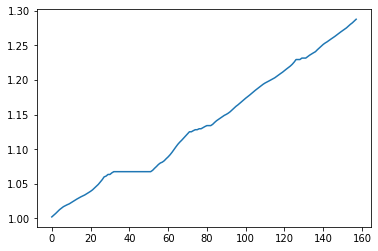

In [102]:
plt.plot(np.cumprod(portfolio_returns))
plt.show()

In [ ]:
# My version

idx=0
ptf_ret=[]
for t1 in t1s:
    t2=t1+dT
    t0=t1-T
    print(t1)
#    rets_loop=np.array(rets.values[t0:t1,1:],dtype=np.float64)
    sel_cols=all_sel_cols[idx]

    rets_OOS=np.array(rets.values[t1:t2,1:],dtype=np.float64)
    rets_OOS=rets_OOS[:,sel_cols]
    rets_OOS=rets_OOS[:,:100]
    
    rets_OOS[np.isnan(rets_OOS)]=0
    rets_OOS[np.abs(rets_OOS)>0.3]=0
    cumrets_OOS=np.cumprod(1+rets_OOS,axis=1)
    ptf_ret.append(np.nanmean(cumrets_OOS[-1,ptf[idx]==1])-1)
    idx+=1
    

In [ ]:
# Previous version

idx=0
ptf_ret=[]
for t1 in t1s:
    t2=t1+dT
    t0=t1-T
    print(t1)
#    rets_loop=np.array(rets.values[t0:t1,1:],dtype=np.float64)
    sel_cols=all_sel_cols[idx]



    rets_OOS=np.array(rets.values[t1:t2,1:],dtype=np.float64)
    rets_OOS=rets_OOS[:,sel_cols]
    rets_OOS=rets_OOS[:,:100]
    
    rets_OOS[np.isnan(rets_OOS)]=0
    rets_OOS[np.abs(rets_OOS)>0.3]=0
    cumrets_OOS=np.cumprod(1+rets_OOS,axis=1)
    ptf_ret.append(np.nanmean(cumrets_OOS[-1,ptf[idx]==1])-1)
    idx+=1
    

In [ ]:
idx = 0
ptf_returns = []
for t1 in t1s:
    t2 = t1+dT
    

In [ ]:
ptf_ret_v=np.array(ptf_ret)

In [ ]:
ptf_logret_v=np.log(1+ptf_ret_v)

In [ ]:
ptf_ret_v[np.isnan(ptf_ret_v)]=0


In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(ptf_ret_v)),np.cumprod(1+ptf_ret_v))
plt.yscale("log")